In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Init Plugin
Init Graph Optimizer
Init Kernel


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [17]:
x_train = x_train[...,np.newaxis].astype('float32') / 255.0
x_test = x_test[...,np.newaxis].astype('float32') / 255.0

In [8]:
model = keras.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(32,3,activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(32,activation='relu'),
    layers.Dense(10,activation= 'softmax')
])

Metal device set to: Apple M1


2021-09-28 16:31:49.419730: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-09-28 16:31:49.419992: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                51232     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [12]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer = keras.optimizers.Adam(),
    metrics = ['acc']
)

In [20]:
x_eval = x_test[:4000]
y_eval = y_test[:4000]

In [22]:
x_test = x_test[4001:]
y_test = y_test[4001:]

In [23]:
hist = model.fit(x_train,y_train,epochs=10,validation_data=(x_eval,y_eval))

2021-09-28 16:40:06.566572: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-28 16:40:06.570368: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-09-28 16:40:06.713596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.1748 - acc: 0.9455

2021-09-28 16:40:23.553935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 18s 8ms/step - loss: 0.1746 - acc: 0.9456 - val_loss: 0.0799 - val_acc: 0.9753
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0562 - acc: 0.9826 - val_loss: 0.0574 - val_acc: 0.9815
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0404 - acc: 0.9876 - val_loss: 0.0563 - val_acc: 0.9815
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0306 - acc: 0.9904 - val_loss: 0.0650 - val_acc: 0.9793
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0245 - acc: 0.9924 - val_loss: 0.0584 - val_acc: 0.9810
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0199 - acc: 0.9938 - val_loss: 0.0447 - val_acc: 0.9860
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0151 - acc: 0.9952 - val_loss: 0.0598 - val_acc: 0.9820
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/st

In [25]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

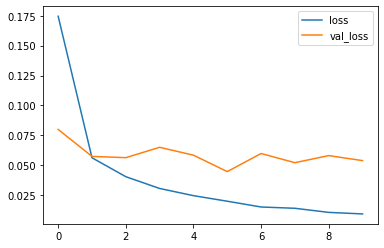

In [26]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()

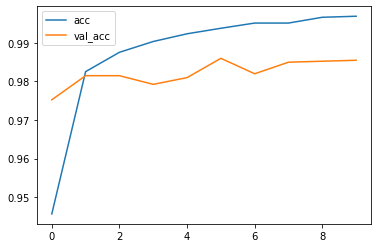

In [27]:
plt.plot(hist.history['acc'],label='acc')
plt.plot(hist.history['val_acc'],label='val_acc')
plt.legend()

In [94]:
def show(layers,images,size=15,kernal_index=0):
    layers_len = len(layers)
    fig,ax = plt.subplots(len(images),layers_len)
    fig.set_figheight(size)
    fig.set_figwidth(size)
    for i,img in enumerate(images):
        out = img[np.newaxis,...]
        for l,layer in enumerate(layers):
            out = layer(out)
            ax[i][l].imshow(out[0,:,:,toshow])

In [ ]:
show(model.layers[:4],x_train[:10],kernal_index=10)

In [81]:
model.layers

In [72]:
x.shape

(1, 28, 28, 1)